## Import

In [91]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [82]:
data = pd.read_csv("salesdaily.csv")
data

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [37]:
data1 = pd.read_csv("salesweekly.csv")

In [83]:
data['datum'] = pd.to_datetime(data['datum'], infer_datetime_format=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         2106 non-null   datetime64[ns]
 1   M01AB         2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   R06           2106 non-null   float64       
 9   Year          2106 non-null   int64         
 10  Month         2106 non-null   int64         
 11  Hour          2106 non-null   int64         
 12  Weekday Name  2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 214.0+ KB


In [40]:
data['datum'] = pd.to_datetime(data['datum'])

In [41]:
data.describe()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,2016-11-19 12:00:00.000000256,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
min,2014-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,2015-06-12 06:00:00,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,2016-11-19 12:00:00,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,2018-04-29 18:00:00,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,2019-10-08 00:00:00,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000
std,NaN,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547


In [42]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64


In [43]:
data.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'Year', 'Month', 'Hour', 'Weekday Name'],
      dtype='object')

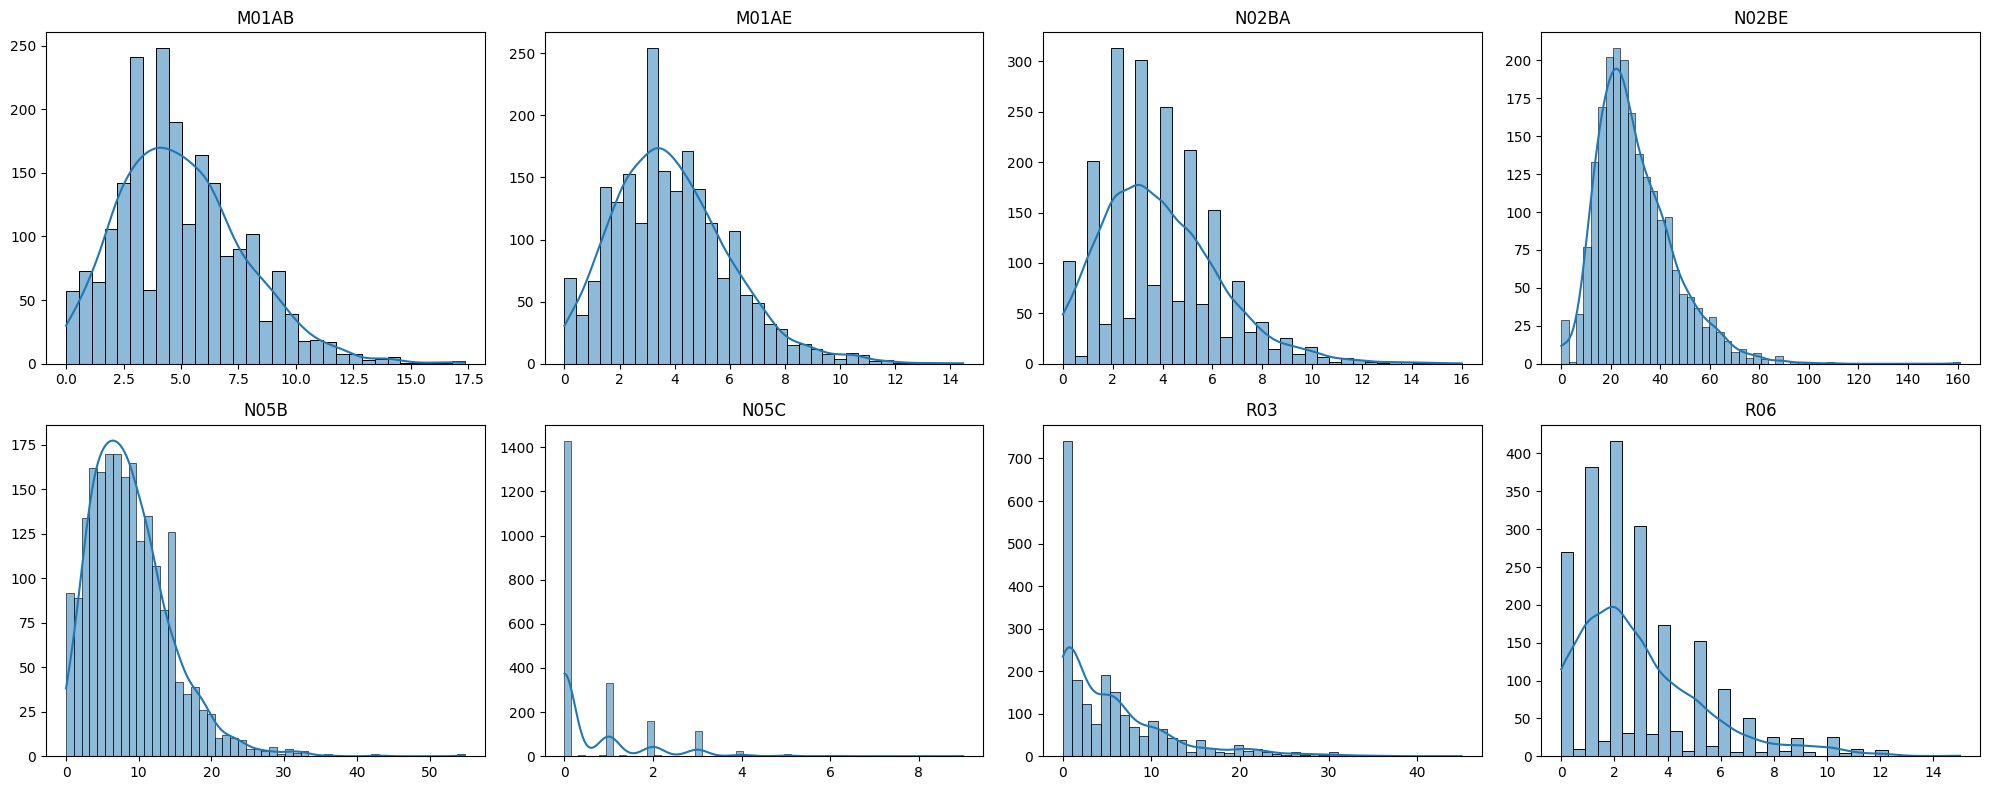

In [44]:
columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03','R06']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

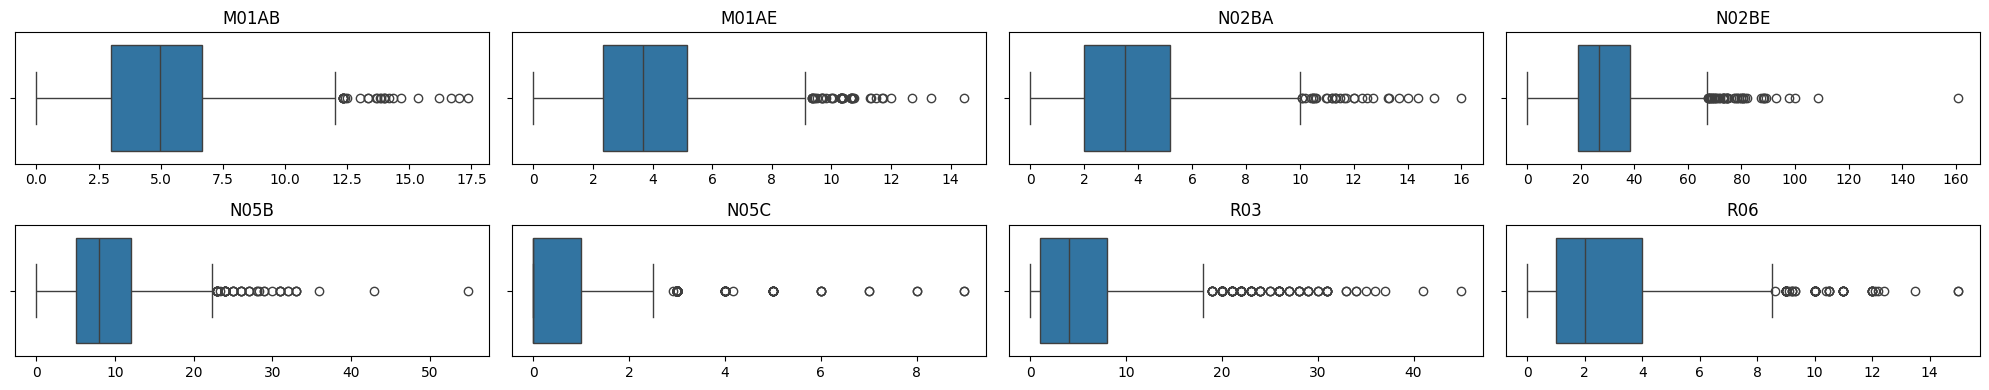

In [45]:
fig, axes = plt.subplots(2, 4, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [46]:
def plot(data, columns, x):
    fig, axes = plt.subplots(4, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

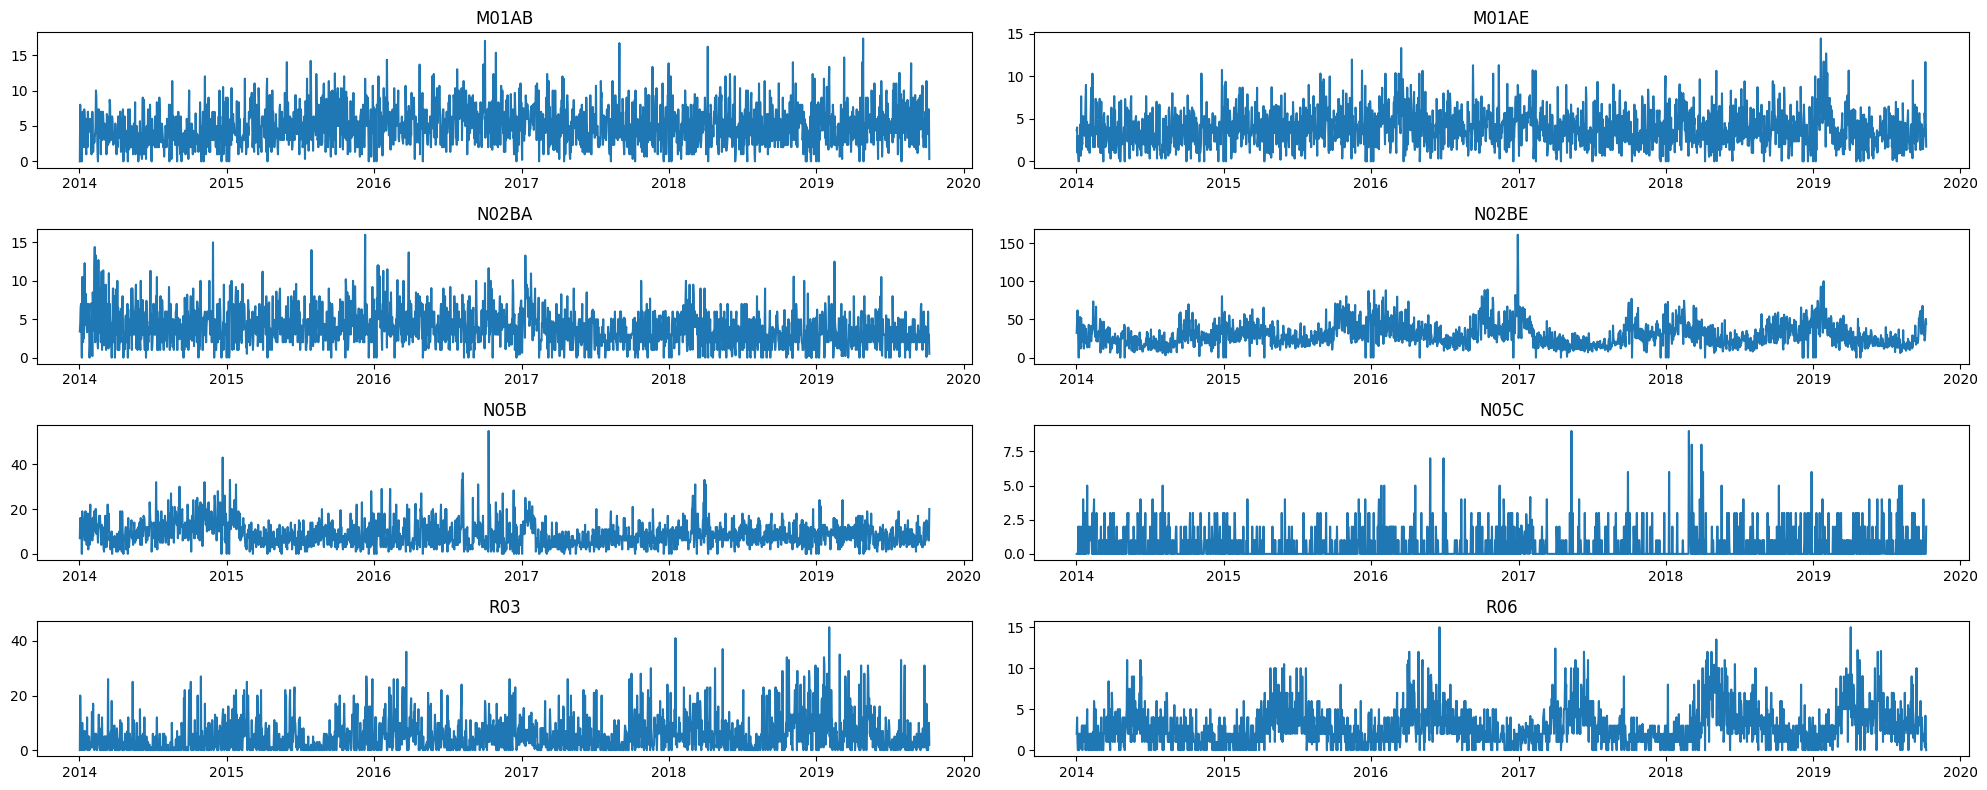

In [47]:
plot(data, columns, 'datum')

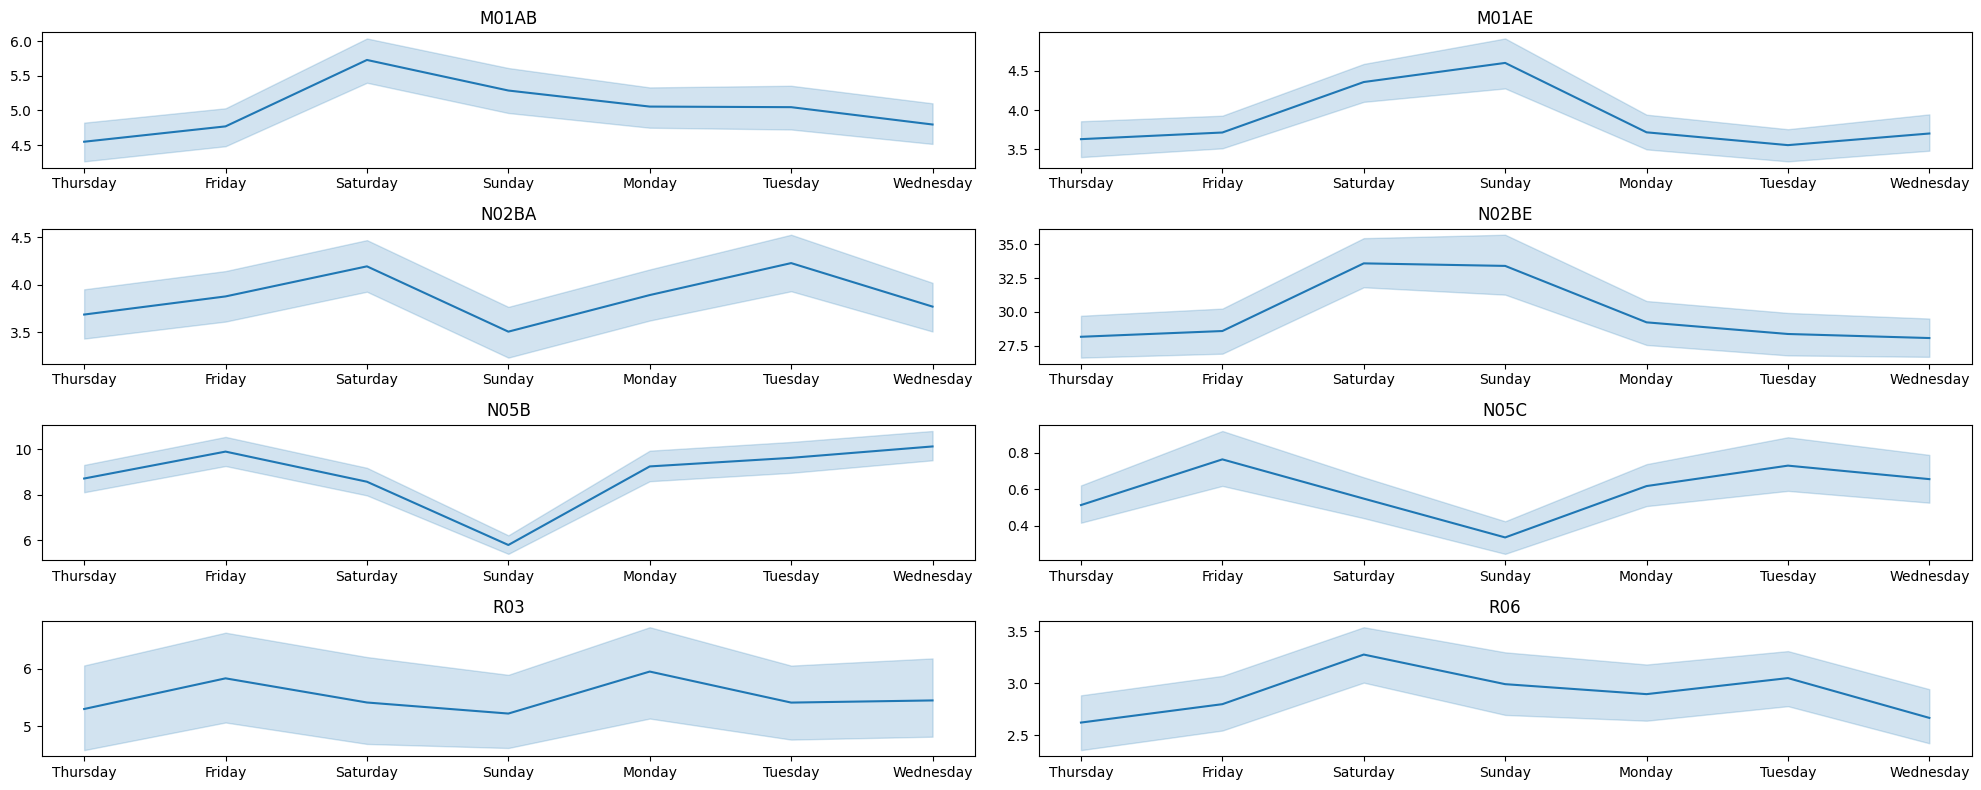

In [48]:
plot(data, columns, 'Weekday Name')

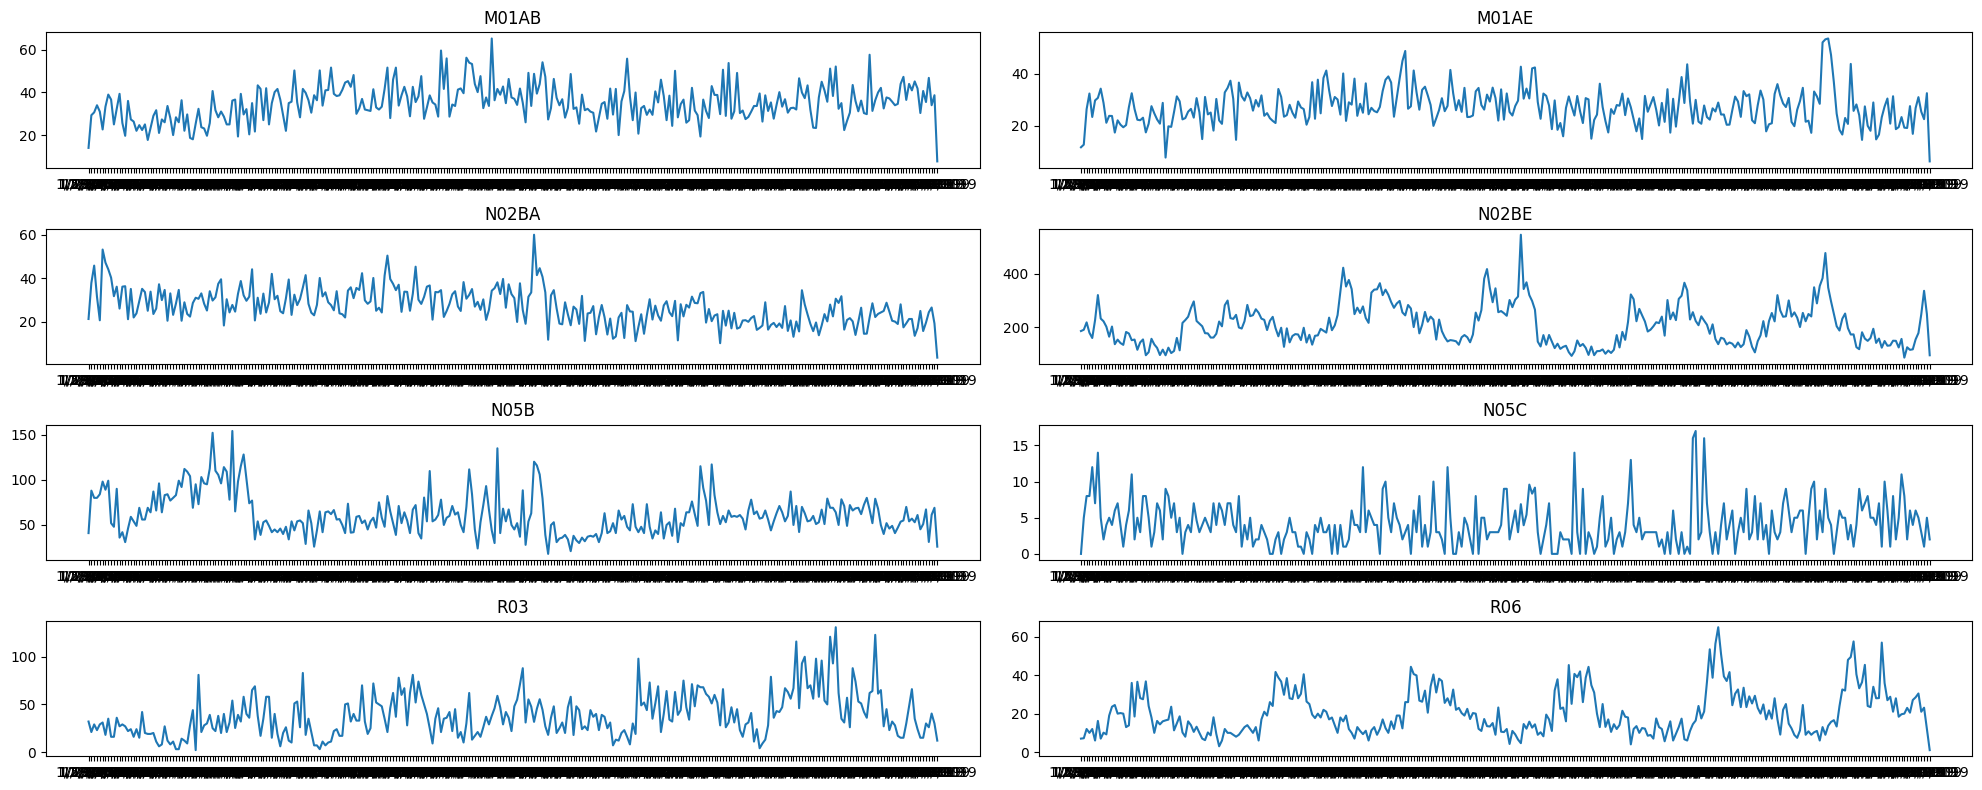

In [49]:
plot(data1, columns, 'datum')

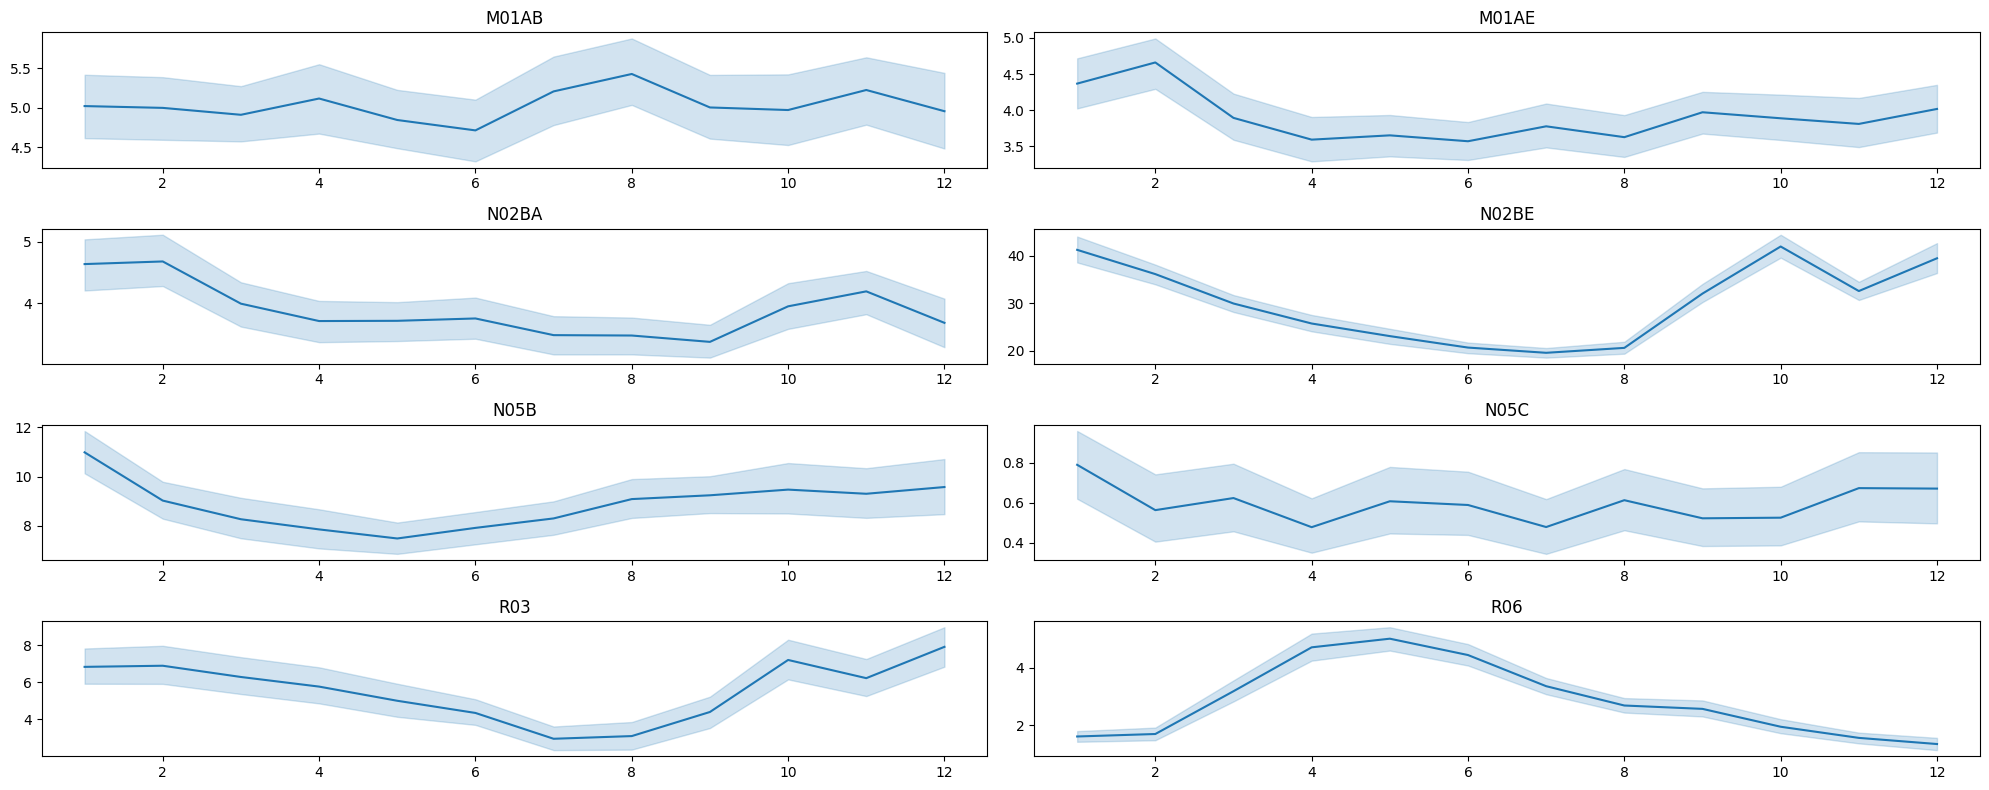

In [50]:
plot(data, columns, 'Month')

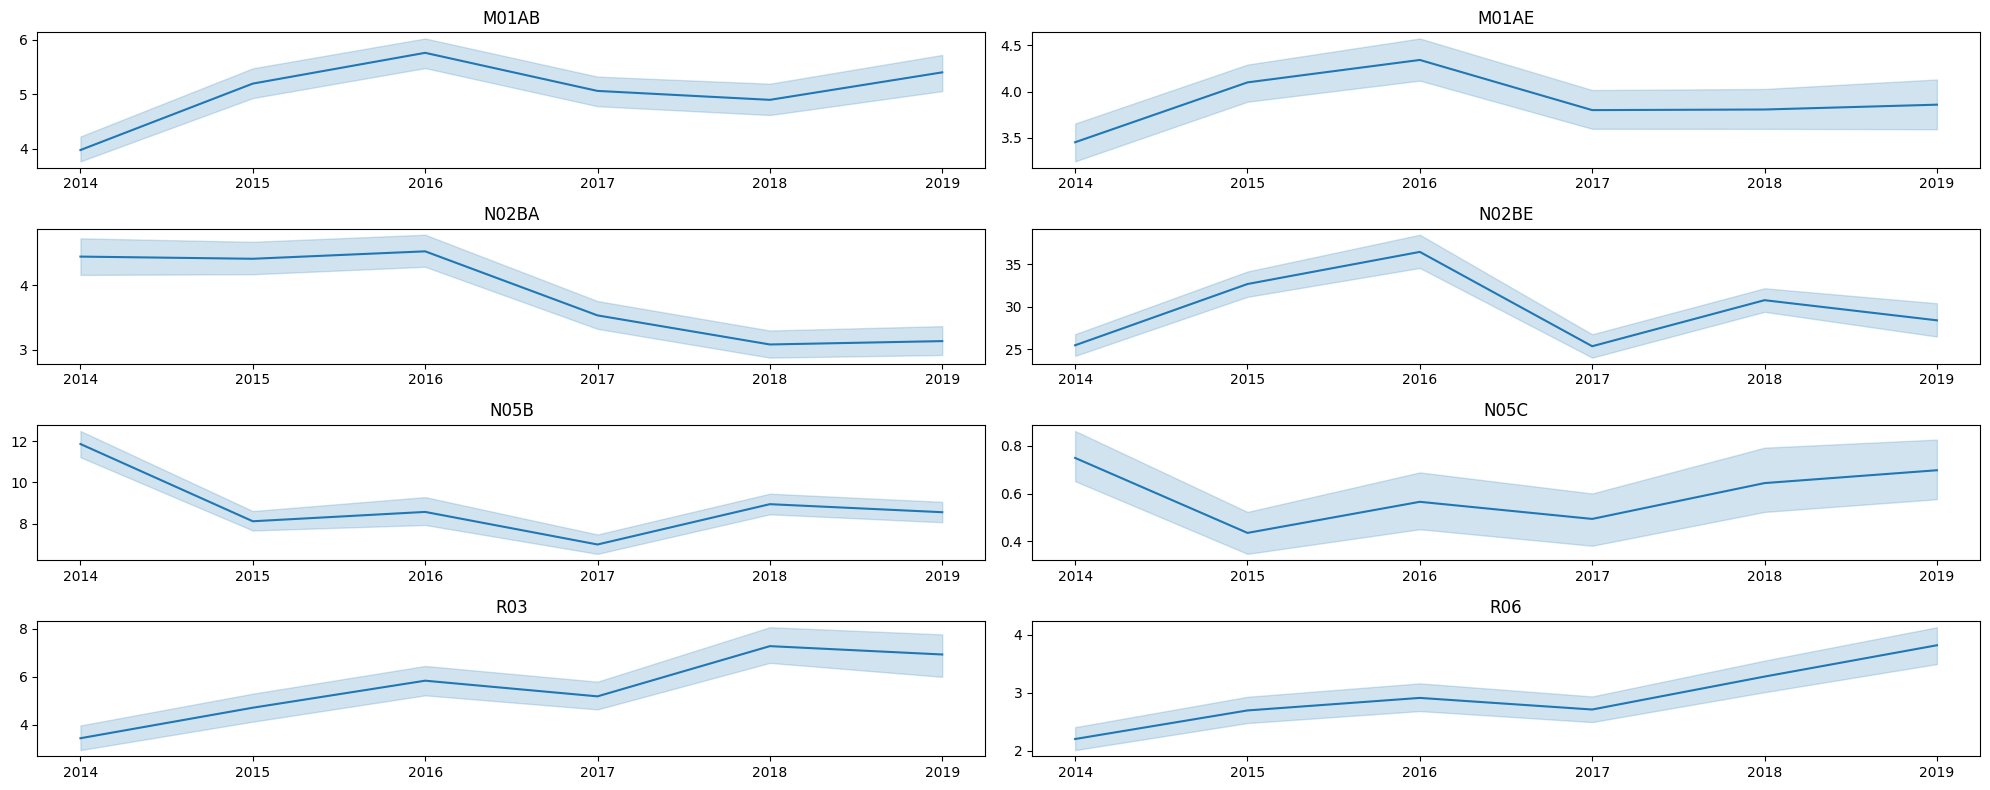

In [51]:
plot(data, columns, 'Year')

In [52]:
data['Weekday Name'].value_counts()

Weekday Name
Thursday     301
Friday       301
Saturday     301
Sunday       301
Monday       301
Tuesday      301
Wednesday    300
Name: count, dtype: int64

In [84]:
scale_mapper = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
    }

data['Weekday Name'] = data['Weekday Name'].replace(scale_mapper)
data["Day"] = data["datum"].dt.day


In [85]:
data["Season"] =    np.where(data["Month"].isin([3,4,5]),"Spring",
                    np.where(data["Month"].isin([6,7,8]), "Summer",
                    np.where(data["Month"].isin ([9,10,11]),"Fall",
                    np.where(data["Month"].isin ([12,1,2]),"Winter","None"))))

In [86]:
data.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,Day,Season
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,3,2,Winter
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,4,3,Winter
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,5,4,Winter
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,6,5,Winter
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,0,6,Winter


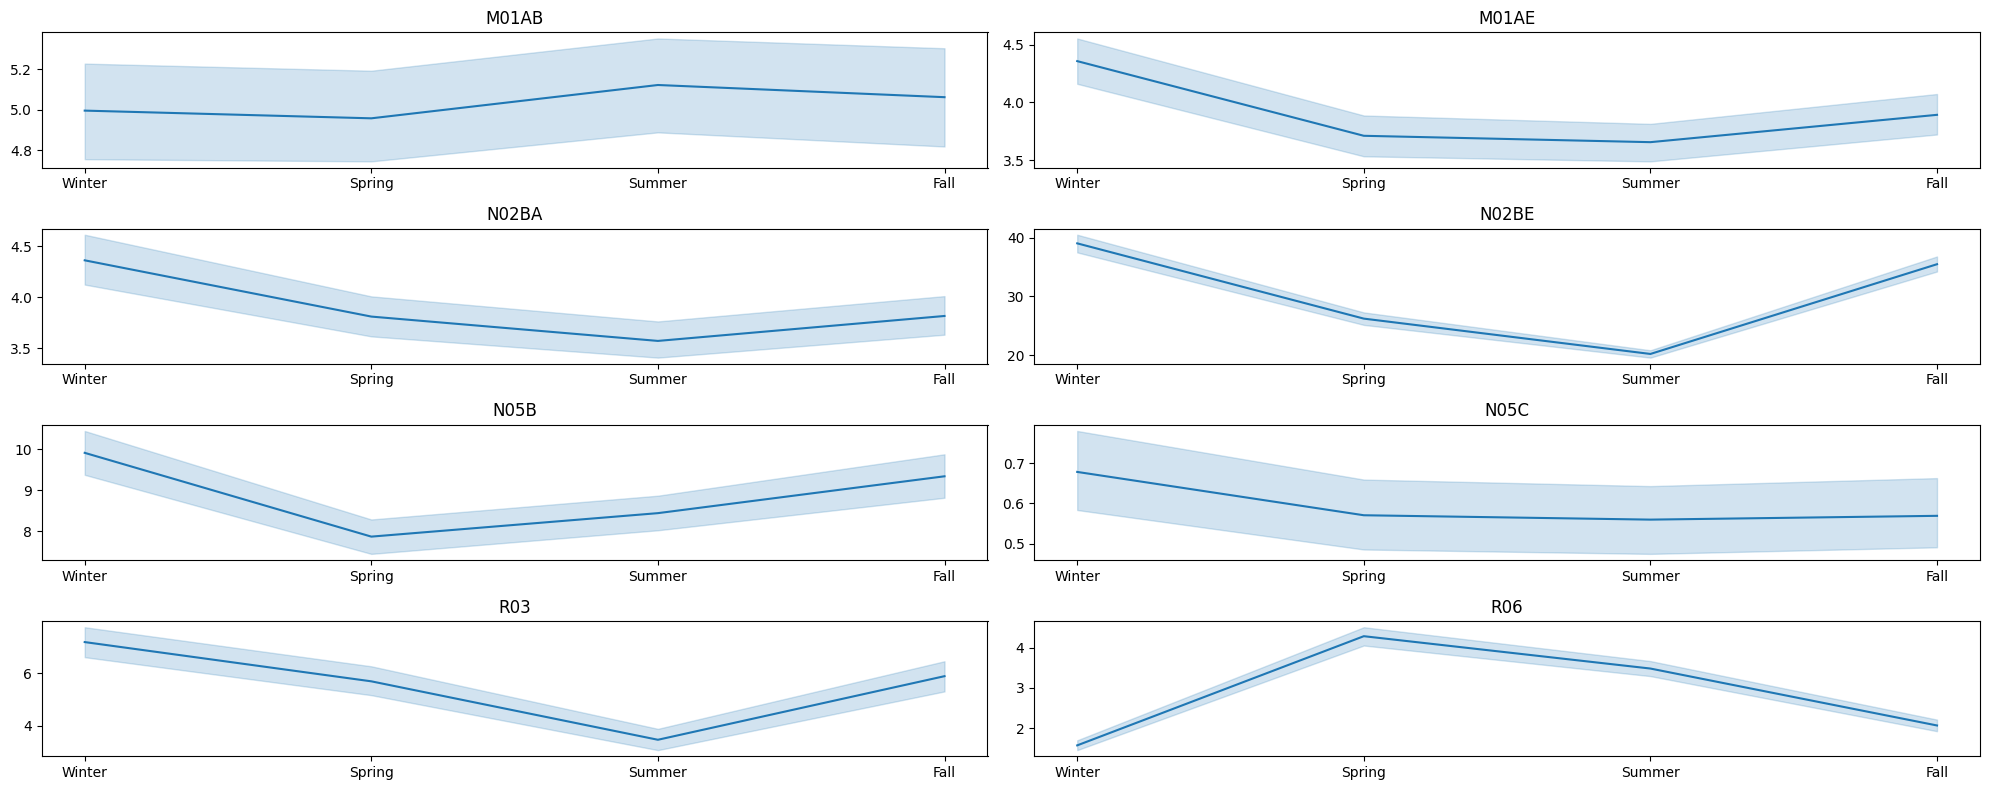

In [56]:
plot(data, columns, 'Season')

In [87]:
data = pd.get_dummies(data=data, columns=['Season'])


In [88]:
data = data.drop(columns=['Hour', 'datum'])

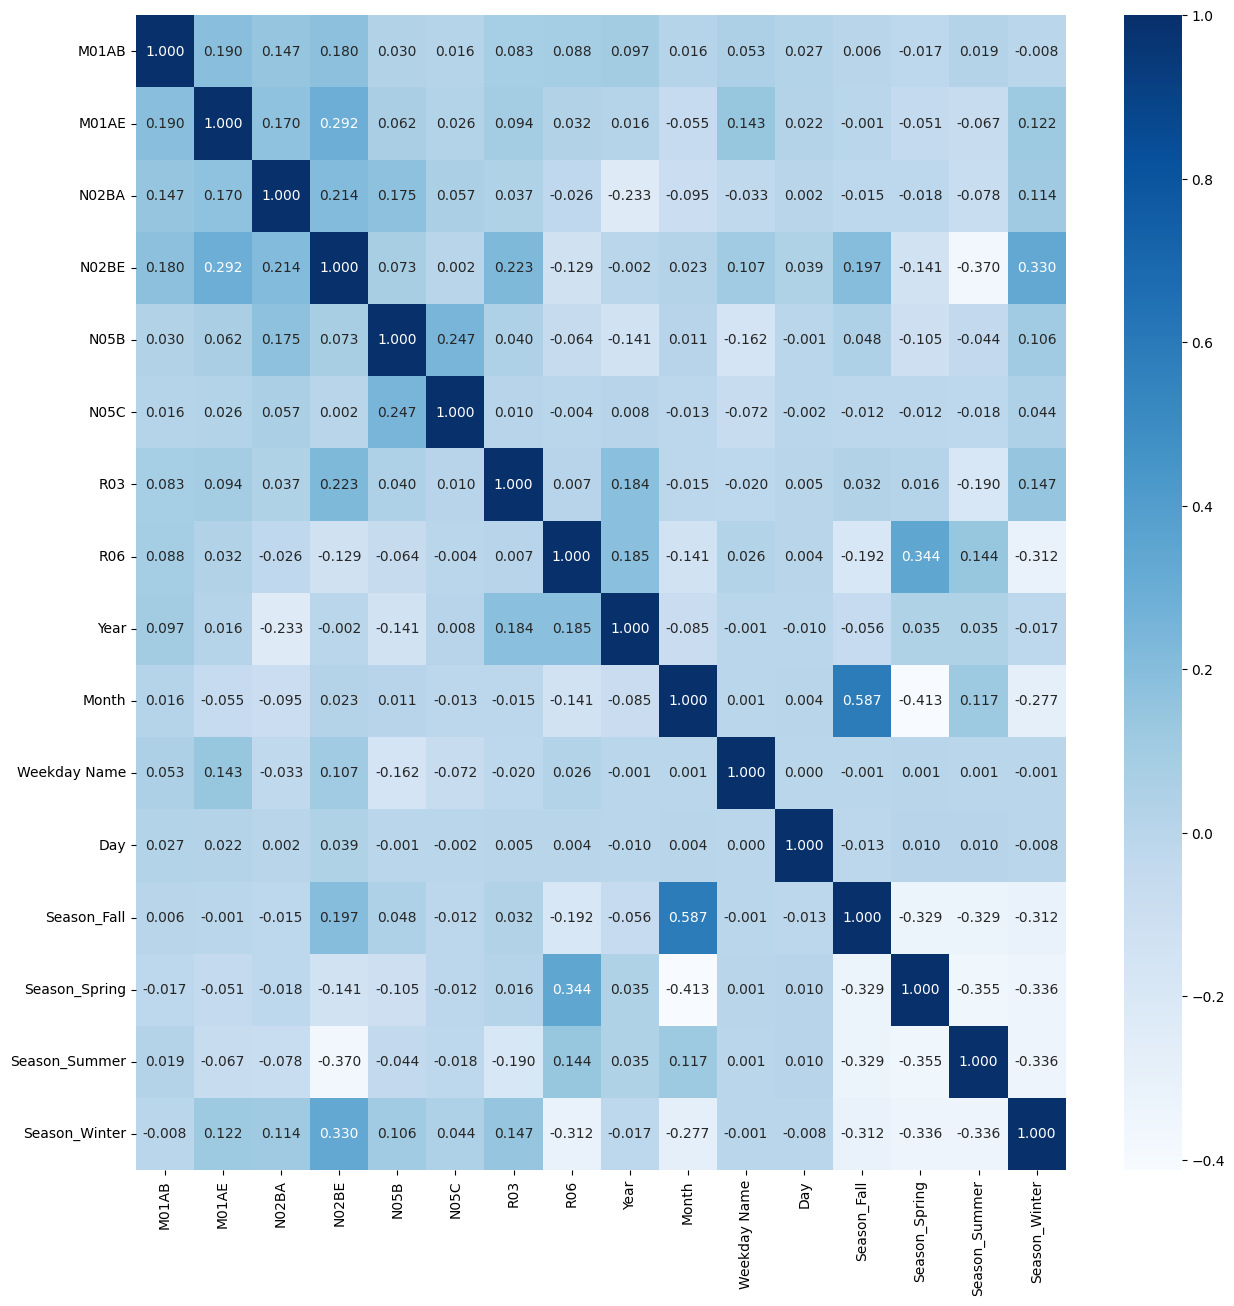

In [59]:
df_corr = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

Podela podataka na train, val i test skup (70%, 20%, 10%).

In [107]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (1474, 16) 
Validation size :  (421, 16) 
Test Size :  (211, 16)


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Weekday Name,Day,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0.00,3.670,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,3,2,False,False,False,True
1,8.00,4.000,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,4,3,False,False,False,True
2,2.00,1.000,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,5,4,False,False,False,True
3,4.00,3.000,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,6,5,False,False,False,True
4,5.00,1.000,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,0,6,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,9.33,7.406,6.0,44.50,12.0,0.0,6.0,2.0,2018,1,2,10,False,False,False,True
1470,4.00,4.330,5.5,37.60,7.0,0.0,5.0,0.0,2018,1,3,11,False,False,False,True
1471,5.66,1.330,3.0,42.00,11.0,0.0,10.0,0.0,2018,1,4,12,False,False,False,True
1472,3.50,3.495,3.2,32.00,6.0,0.0,8.0,1.0,2018,1,5,13,False,False,False,True


In [105]:
train_df.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Weekday Name', 'Day', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

Normalizacija podataka

In [108]:
scaler = MinMaxScaler()

col = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Weekday Name', 'Day', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Weekday Name,Day,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0.000000,0.275112,0.21250,0.201242,0.127660,0.000000,0.000000,0.133333,0.0,0.0,0.500000,0.033333,0.0,0.0,0.0,1.0
1,0.470588,0.299850,0.27500,0.314286,0.291793,0.000000,0.555556,0.266667,0.0,0.0,0.666667,0.066667,0.0,0.0,0.0,1.0
2,0.117647,0.074963,0.40625,0.384161,0.182371,0.000000,0.250000,0.066667,0.0,0.0,0.833333,0.100000,0.0,0.0,0.0,1.0
3,0.235294,0.224888,0.43750,0.255280,0.145897,0.000000,0.083333,0.000000,0.0,0.0,1.000000,0.133333,0.0,0.0,0.0,1.0
4,0.294118,0.074963,0.28125,0.134783,0.291793,0.222222,0.166667,0.133333,0.0,0.0,0.000000,0.166667,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0.548824,0.555172,0.37500,0.276398,0.218845,0.000000,0.166667,0.133333,1.0,0.0,0.333333,0.300000,0.0,0.0,0.0,1.0
1470,0.235294,0.324588,0.34375,0.233540,0.127660,0.000000,0.138889,0.000000,1.0,0.0,0.500000,0.333333,0.0,0.0,0.0,1.0
1471,0.332941,0.099700,0.18750,0.260870,0.200608,0.000000,0.277778,0.000000,1.0,0.0,0.666667,0.366667,0.0,0.0,0.0,1.0
1472,0.205882,0.261994,0.20000,0.198758,0.109422,0.000000,0.222222,0.066667,1.0,0.0,0.833333,0.400000,0.0,0.0,0.0,1.0


In [109]:
def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size])
    return np.array(X), np.array(Y)

In [110]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 11, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 11, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 11, 1)

In [64]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (1463, 11, 16) (1463, 16) 
 Val size :  (410, 11, 16) (410, 16) 
 Test Size :  (200, 11, 16) (1463, 16)


In [111]:
history = History()

model = tf.keras.Sequential()

# adding RNN layers and dropout regularization 
model.add(tf.keras.layers.SimpleRNN(units = 50, 
                        activation = "tanh",
                        input_shape=(X_train.shape[1], X_train.shape[2]),
                        return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
 
model.add(tf.keras.layers.SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True))
 
model.add(tf.keras.layers.SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))
 
model.add( tf.keras.layers.SimpleRNN(units = 50))

# adding the output layer
model.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))

# compiling RNN
model.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6, 
                                  momentum=0.9, 
                                  nesterov=True), 
                  loss = "mean_squared_error")
 
history =model.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 11, batch_size = 1)
model.summary()

Epoch 1/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0995 - val_loss: 0.1259
Epoch 2/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0947 - val_loss: 0.1258
Epoch 3/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0958 - val_loss: 0.1258
Epoch 4/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0956 - val_loss: 0.1250
Epoch 5/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0959 - val_loss: 0.1250
Epoch 6/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0957 - val_loss: 0.1256
Epoch 7/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0954 - val_loss: 0.1259
Epoch 8/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0959 - val_loss: 0.1256
Epoch 9/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0948 - val_loss: 0.1252
Epoch 10/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0957 - val_loss: 0.1254
Epoch 11/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0957 - val_loss: 0.1250


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)       │ (None, 11, 50)         │         3,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_13 (SimpleRNN)       │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_14 (SimpleRNN)       │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_15 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,104 (144.94 KB)

 Trainable params: 18,551 (72.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,553 (72.48 KB)

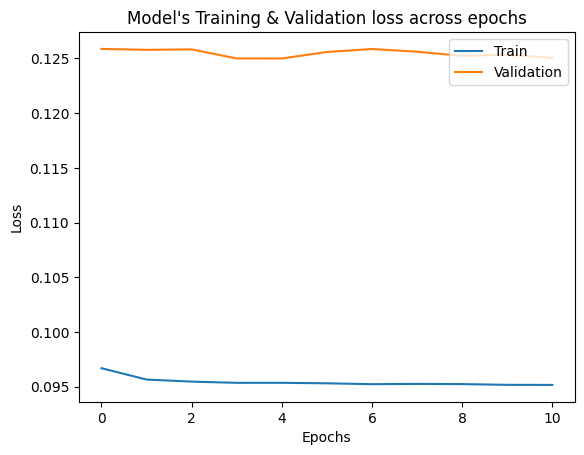

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [128]:
regressorLSTM = tf.keras.Sequential()
 
#Adding LSTM layers
regressorLSTM.add(tf.keras.layers.LSTM(50, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(tf.keras.layers.LSTM(50, 
                       return_sequences = False))
regressorLSTM.add(tf.keras.layers.Dense(25))
 
#Adding the output layer
regressorLSTM.add(tf.keras.layers.Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["mean_absolute_error"])
 
#Fitting the model
history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=20,batch_size=32)


regressorLSTM.summary()

result = regressorLSTM.evaluate(X_test,Y_test)

for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0957 - mean_absolute_error: 0.2467 - val_loss: 0.1252 - val_mean_absolute_error: 0.2859
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0956 - mean_absolute_error: 0.2468 - val_loss: 0.1251 - val_mean_absolute_error: 0.2876
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0949 - mean_absolute_error: 0.2457 - val_loss: 0.1251 - val_mean_absolute_error: 0.2890
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0946 - mean_absolute_error: 0.2453 - val_loss: 0.1253 - val_mean_absolute_error: 0.2843
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0944 - mean_absolute_error: 0.2442 - val_loss: 0.1255 - val_mean_absolute_error: 0.2833
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0951 - mean_absolute_error: 0.2454 - val_loss: 0.1251 - val_mean_absolute_error: 0.2868
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0948 - mean_absolute_error: 0.2451 - val_loss: 0.125

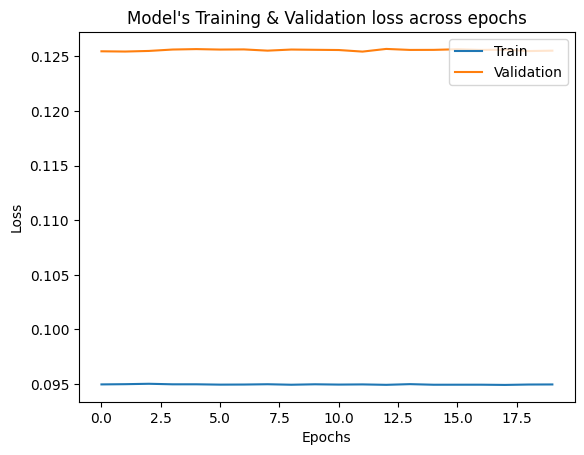

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [70]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True)

In [124]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.metrics.MeanAbsoluteError()]
)
model.summary()
history = model.fit(X_train, Y_train,
                    epochs=20, batch_size=32,
                    validation_data=(X_val, Y_val),
                    validation_split=0.1,
                    callbacks=[history])

result = model.evaluate(X_test,Y_test)

for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 11, 32)         │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,425 (36.82 KB)

 Trainable params: 9,425 (36.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1311 - mean_absolute_error: 0.2776 - val_loss: 0.1263 - val_mean_absolute_error: 0.2935
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0967 - mean_absolute_error: 0.2464 - val_loss: 0.1260 - val_mean_absolute_error: 0.2872
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0968 - mean_absolute_error: 0.2476 - val_loss: 0.1258 - val_mean_absolute_error: 0.2891
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0967 - mean_absolute_error: 0.2489 - val_loss: 0.1259 - val_mean_absolute_error: 0.2855
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0964 - mean_absolute_error: 0.2476 - val_loss: 0.1258 - val_mean_absolute_error: 0.2862
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0962 - mean_absolute_error: 0.2471 - val_loss: 0.1257 - val_mean_absolute_error: 0.2939
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0955 - mean_absolute_error: 0.2463 - val_loss: 0.

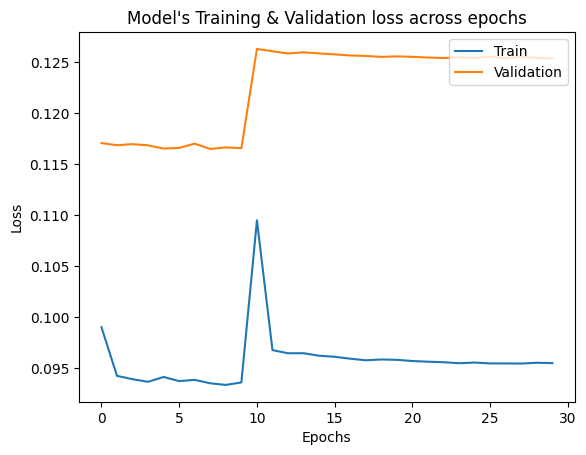

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()